In [52]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pydotplus     # Anaconda Prompt에서 pip install pydotplus 라고 치면 pydotplus가 설치된다.
import os

warnings.filterwarnings(action='ignore')

In [53]:
care_data = pd.read_csv('/home/salmon10/care/fia_total.csv')
care_data

,C0,C2,C3,C3.DC..C4.OH.,C3.OH,C3.1,C4,C4.1,C5,C5.DC..C6.OH.,...,SM.C16.0,SM.C16.1,SM.C18.0,SM.C18.1,SM.C20.2,SM.C24.0,SM.C24.1,SM.C26.0,SM.C26.1,Response
0,5.361554,2.881123,-1.822915,-3.706124,-4.587969,-4.494403,-2.707766,-4.561210,-3.078127,-4.633250,...,7.197344,4.671775,5.288269,4.365361,0.617705,5.291557,6.971146,-2.115127,-1.124796,Non-Response
1,4.867096,3.037732,-2.215942,-4.048670,-4.952500,-4.812930,-2.782433,-4.895482,-3.277169,-4.893213,...,6.736452,4.007003,4.686248,3.739369,0.184236,4.720928,6.527317,-2.002059,-1.250392,Non-Response
2,5.252625,2.943157,-1.668455,-3.657480,-4.558221,-4.475895,-2.275842,-4.480444,-2.705753,-4.548077,...,6.022644,3.499063,4.555545,3.406386,0.476002,4.420943,5.726367,-2.729979,-2.250392,Non-Response
3,5.396829,2.788545,-0.738963,-2.409552,-4.104503,-4.060858,-1.466487,-4.088127,-1.828812,-4.171929,...,7.219877,4.719563,5.491980,4.582463,0.993958,5.236054,7.113883,-1.739024,-0.891196,Non-Response
4,4.923855,1.417803,-2.706511,-3.689660,-4.434085,-4.394059,-2.937676,-4.369023,-3.747692,-4.619830,...,7.337758,4.450847,5.811225,4.580589,0.955566,5.534978,7.339993,-1.607865,-0.647472,Non-Response
5,4.714104,4.433923,-2.420393,-1.912854,-4.106031,-3.994452,-2.760371,-3.909592,-3.318299,-3.555700,...,7.501877,5.014372,6.237017,5.331561,1.271253,5.731607,7.583722,-1.306832,-0.215280,Non-Response
6,4.993564,2.832841,-1.879348,-3.896111,-4.496821,-4.304792,-2.152688,-4.399397,-3.500777,-4.494299,...,7.210646,4.691363,5.272503,4.568811,1.336471,5.041229,6.945461,-1.928614,-0.991427,Non-Response
7,5.414317,2.622694,-1.866533,-3.471613,-4.655519,-4.569005,-2.340290,-4.639142,-3.418723,-4.817264,...,6.956842,4.345588,4.969027,4.027874,0.280452,5.076727,6.654719,-1.991212,-1.294891,Non-Response
8,5.244826,2.733092,-0.907953,-3.536464,-4.409358,-4.332937,-2.392487,-4.337486,-2.464047,-4.487956,...,7.158476,4.702422,5.442398,4.563927,0.535709,5.172803,6.831483,-1.887001,-1.130772,Non-Response
9,5.021924,1.633450,-1.880736,-3.997587,-4.753979,-4.751561,-2.796424,-4.658508,-3.513513,-4.770754,...,7.091216,4.232891,5.265489,4.306766,0.488422,4.866465,6.770098,-2.023411,-1.321909,Non-Response


In [54]:
care_data.Response = care_data.Response.replace(['Response','Non-Response'], [0,1])
care_data

,C0,C2,C3,C3.DC..C4.OH.,C3.OH,C3.1,C4,C4.1,C5,C5.DC..C6.OH.,...,SM.C16.0,SM.C16.1,SM.C18.0,SM.C18.1,SM.C20.2,SM.C24.0,SM.C24.1,SM.C26.0,SM.C26.1,Response
0,5.361554,2.881123,-1.822915,-3.706124,-4.587969,-4.494403,-2.707766,-4.561210,-3.078127,-4.633250,...,7.197344,4.671775,5.288269,4.365361,0.617705,5.291557,6.971146,-2.115127,-1.124796,1
1,4.867096,3.037732,-2.215942,-4.048670,-4.952500,-4.812930,-2.782433,-4.895482,-3.277169,-4.893213,...,6.736452,4.007003,4.686248,3.739369,0.184236,4.720928,6.527317,-2.002059,-1.250392,1
2,5.252625,2.943157,-1.668455,-3.657480,-4.558221,-4.475895,-2.275842,-4.480444,-2.705753,-4.548077,...,6.022644,3.499063,4.555545,3.406386,0.476002,4.420943,5.726367,-2.729979,-2.250392,1
3,5.396829,2.788545,-0.738963,-2.409552,-4.104503,-4.060858,-1.466487,-4.088127,-1.828812,-4.171929,...,7.219877,4.719563,5.491980,4.582463,0.993958,5.236054,7.113883,-1.739024,-0.891196,1
4,4.923855,1.417803,-2.706511,-3.689660,-4.434085,-4.394059,-2.937676,-4.369023,-3.747692,-4.619830,...,7.337758,4.450847,5.811225,4.580589,0.955566,5.534978,7.339993,-1.607865,-0.647472,1
5,4.714104,4.433923,-2.420393,-1.912854,-4.106031,-3.994452,-2.760371,-3.909592,-3.318299,-3.555700,...,7.501877,5.014372,6.237017,5.331561,1.271253,5.731607,7.583722,-1.306832,-0.215280,1
6,4.993564,2.832841,-1.879348,-3.896111,-4.496821,-4.304792,-2.152688,-4.399397,-3.500777,-4.494299,...,7.210646,4.691363,5.272503,4.568811,1.336471,5.041229,6.945461,-1.928614,-0.991427,1
7,5.414317,2.622694,-1.866533,-3.471613,-4.655519,-4.569005,-2.340290,-4.639142,-3.418723,-4.817264,...,6.956842,4.345588,4.969027,4.027874,0.280452,5.076727,6.654719,-1.991212,-1.294891,1
8,5.244826,2.733092,-0.907953,-3.536464,-4.409358,-4.332937,-2.392487,-4.337486,-2.464047,-4.487956,...,7.158476,4.702422,5.442398,4.563927,0.535709,5.172803,6.831483,-1.887001,-1.130772,1
9,5.021924,1.633450,-1.880736,-3.997587,-4.753979,-4.751561,-2.796424,-4.658508,-3.513513,-4.770754,...,7.091216,4.232891,5.265489,4.306766,0.488422,4.866465,6.770098,-2.023411,-1.321909,1


In [55]:
X = np.array(pd.DataFrame(care_data,
                          columns= ['C0', 'C2', 'C3', 'C3.DC..C4.OH.', 'C3.OH', 'C3.1', 'C4', 'C4.1', 'C5', 'C5.DC..C6.OH.', 'C5.M.DC', 'C5.OH..C3.DC.M.', 'C5.1', 'C5.1.DC', 'C6..C4.1.DC.', 'C6.1', 'C7.DC', 'C8', 'C9', 'C10', 'C10.2', 'C12', 'C14.1', 'C14.1.OH', 'C14.2', 'C14.2.OH', 'C16', 'C16.OH', 'C16.1', 'C16.1.OH', 'C16.2', 'C16.2.OH', 'C18', 'C18.1', 'C18.1.OH', 'C18.2', 'lysoPC.a.C16.0', 'lysoPC.a.C16.1', 'lysoPC.a.C17.0', 'lysoPC.a.C18.0', 'lysoPC.a.C18.1', 'lysoPC.a.C18.2', 'lysoPC.a.C20.3', 'lysoPC.a.C20.4', 'lysoPC.a.C24.0', 'lysoPC.a.C26.0', 'lysoPC.a.C26.1', 'lysoPC.a.C28.0', 'lysoPC.a.C28.1', 'PC.aa.C24.0', 'PC.aa.C28.1', 'PC.aa.C30.0', 'PC.aa.C32.0', 'PC.aa.C32.1', 'PC.aa.C32.3', 'PC.aa.C34.1', 'PC.aa.C34.2', 'PC.aa.C34.3', 'PC.aa.C34.4', 'PC.aa.C36.1', 'PC.aa.C36.2', 'PC.aa.C36.3', 'PC.aa.C36.4', 'PC.aa.C36.5', 'PC.aa.C36.6', 'PC.aa.C38.0', 'PC.aa.C38.3', 'PC.aa.C38.4', 'PC.aa.C38.5', 'PC.aa.C38.6', 'PC.aa.C40.2', 'PC.aa.C40.3', 'PC.aa.C40.4', 'PC.aa.C40.5', 'PC.aa.C40.6', 'PC.aa.C42.0',
       'PC.aa.C42.1', 'PC.aa.C42.2', 'PC.aa.C42.4', 'PC.aa.C42.5', 'PC.aa.C42.6', 'PC.ae.C30.0', 'PC.ae.C30.2', 'PC.ae.C32.1', 'PC.ae.C32.2', 'PC.ae.C34.0', 'PC.ae.C34.1', 'PC.ae.C34.2', 'PC.ae.C34.3', 'PC.ae.C36.0', 'PC.ae.C36.1', 'PC.ae.C36.2', 'PC.ae.C36.3', 'PC.ae.C36.4', 'PC.ae.C36.5', 'PC.ae.C38.0', 'PC.ae.C38.2', 'PC.ae.C38.3', 'PC.ae.C38.4', 'PC.ae.C38.5',
                                   'PC.ae.C38.6', 'PC.ae.C40.1', 'PC.ae.C40.2', 'PC.ae.C40.3', 'PC.ae.C40.4', 'PC.ae.C40.5', 'PC.ae.C40.6', 'PC.ae.C42.1', 'PC.ae.C42.2', 'PC.ae.C42.3', 'PC.ae.C42.4', 'PC.ae.C42.5', 'PC.ae.C44.3', 'PC.ae.C44.4', 'PC.ae.C44.5', 'PC.ae.C44.6', 'SM..OH..C14.1', 'SM..OH..C16.1', 'SM..OH..C22.1', 'SM..OH..C22.2', 'SM..OH..C24.1', 'SM.C16.0', 'SM.C16.1', 'SM.C18.0', 'SM.C18.1', 'SM.C20.2', 'SM.C24.0', 'SM.C24.1', 'SM.C26.0', 'SM.C26.1']))
             
y = np.array(pd.DataFrame(care_data, columns=["Response"]))

train/test accuracies 0.915/0.552


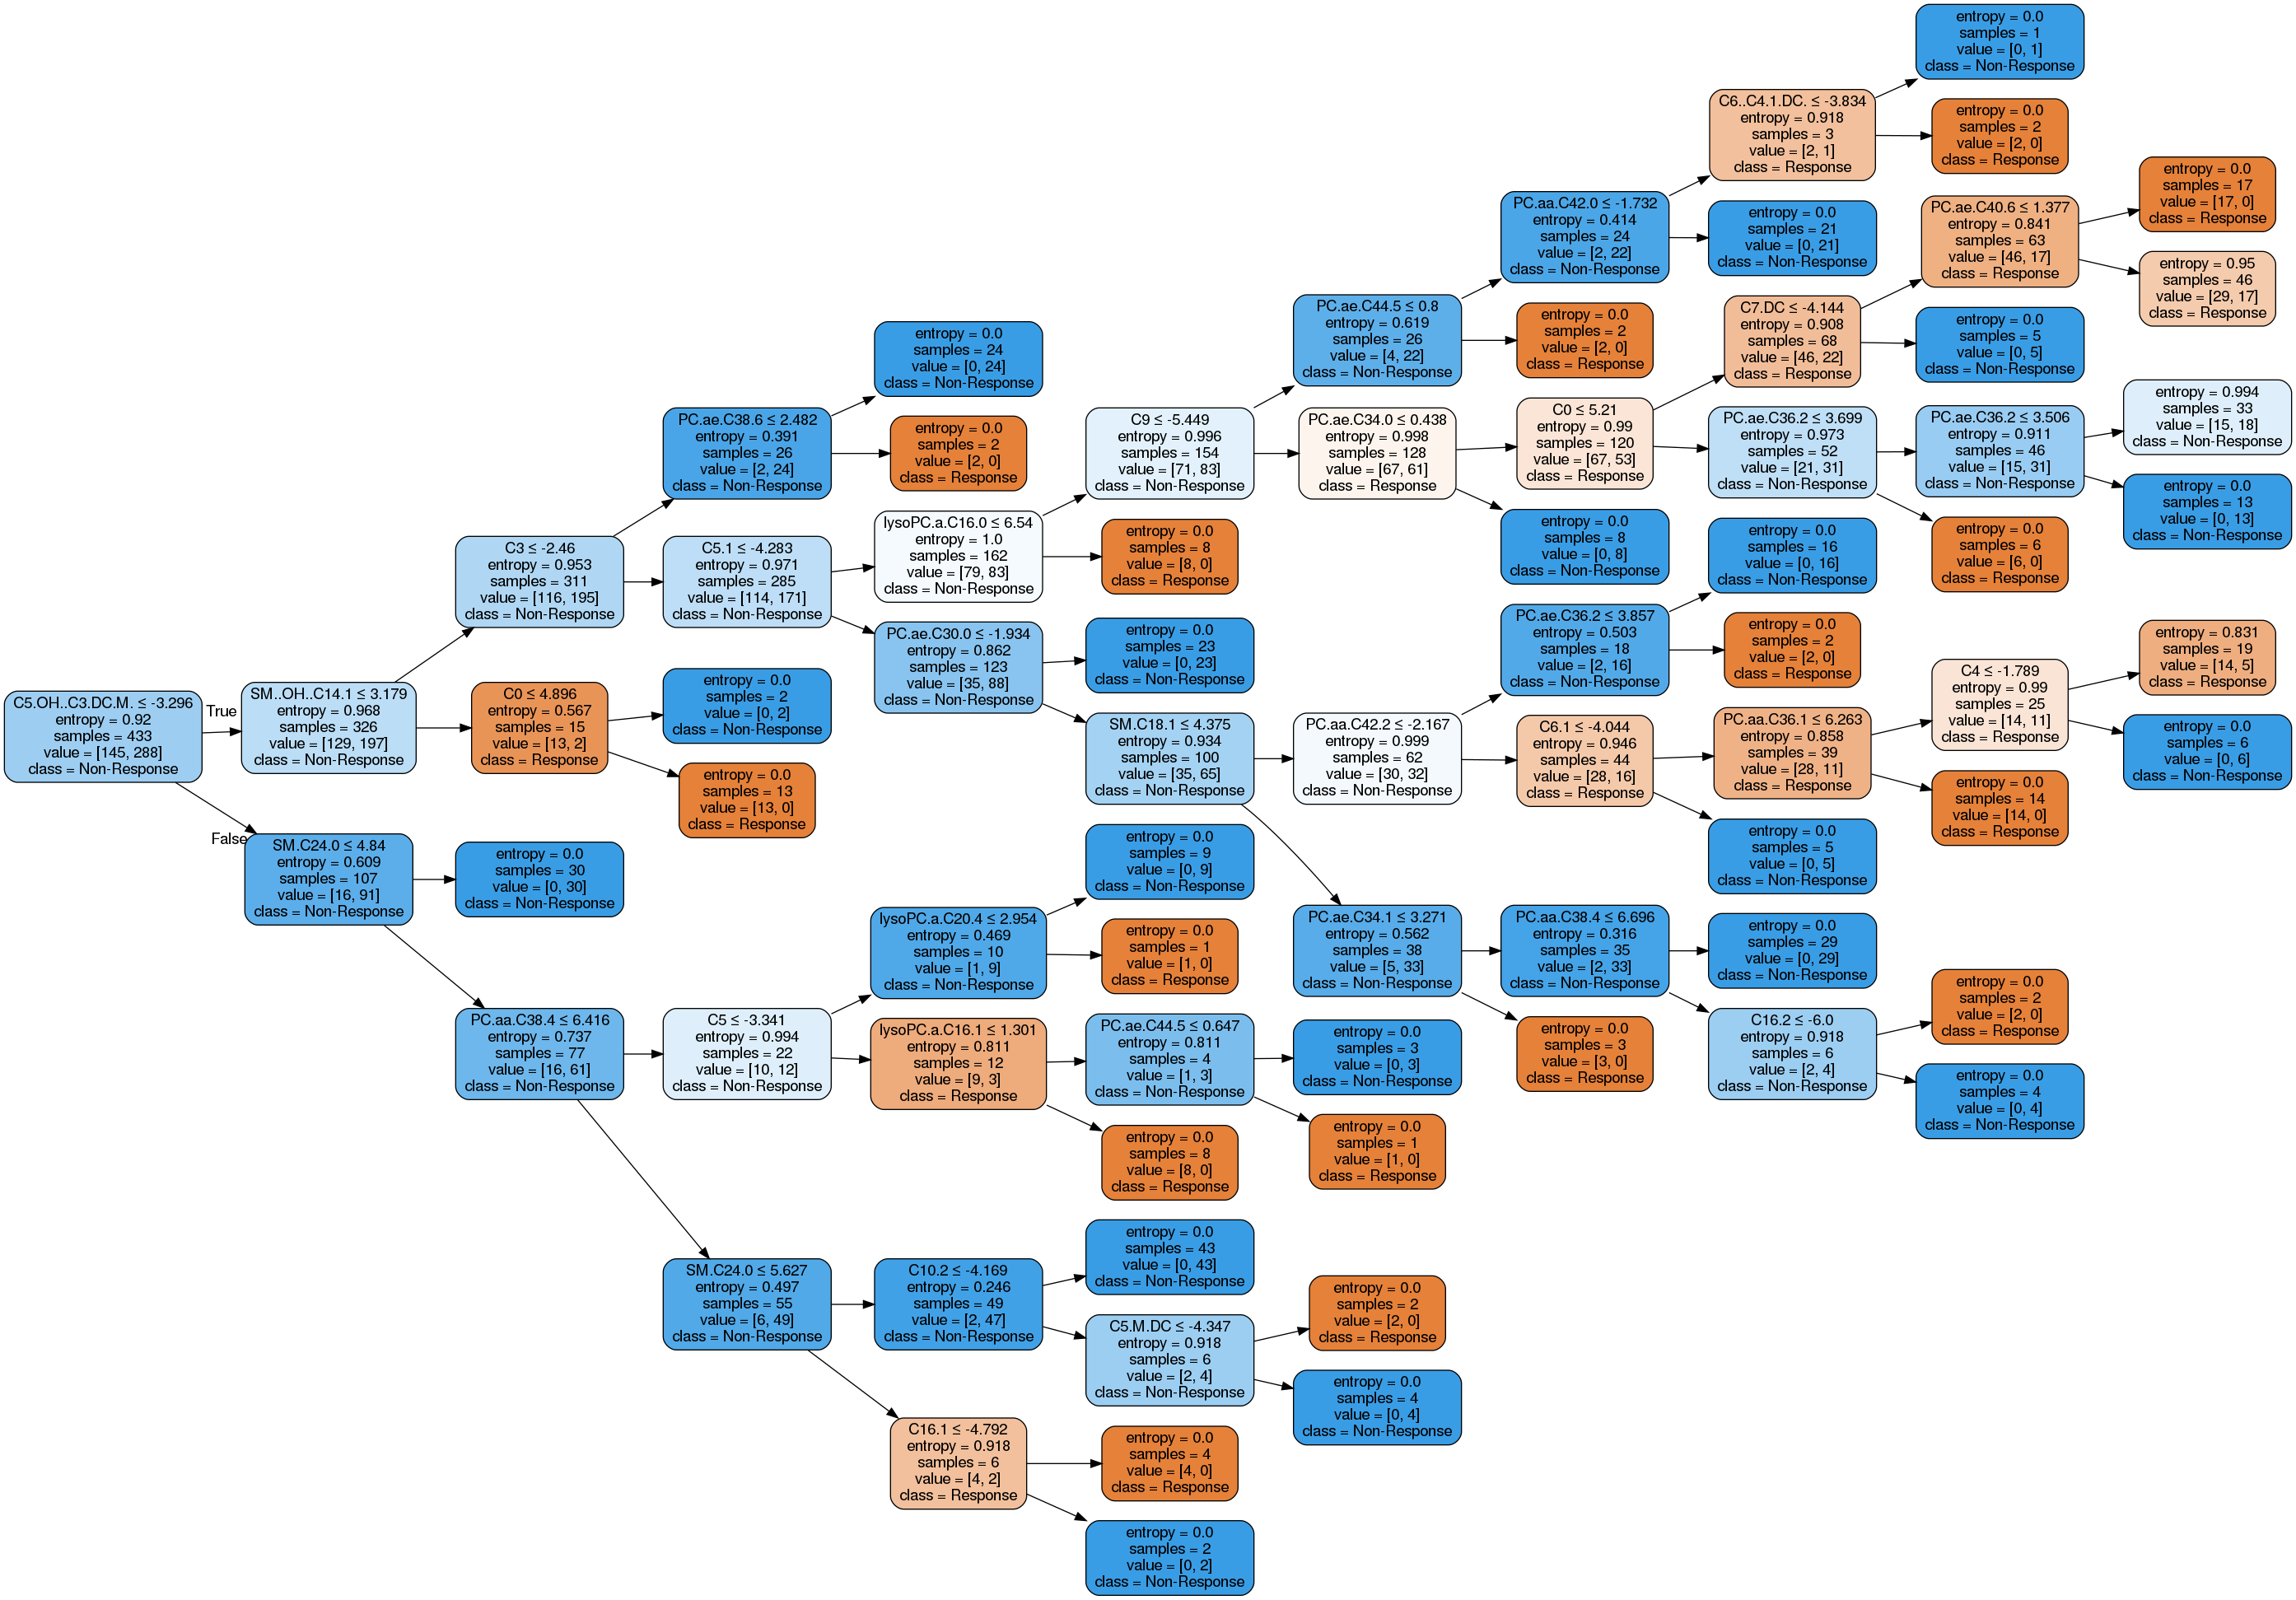

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 10,
                                random_state = 10)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

feature_names = care_data.columns.tolist()
feature_names = feature_names[0:130]
target_name = np.array(['Response','Non-Response'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  rotate= True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
est = 100;
max = 2;
plot_train = []
plot_test = []
for i in range(20):
    dt_clf = RandomForestClassifier(n_estimators= est, criterion='entropy', max_depth = max,
                                random_state = 100, min_samples_split = 10)
    dt_clf = dt_clf.fit(X_train, y_train)
    dt_prediction = dt_clf.predict(X_test)
    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)
    tree_train = accuracy_score(y_train, y_train_pred)
    tree_test = accuracy_score(y_test, y_test_pred)
    print('max_depth = %d train/test accuracies %.3f/%.3f' % (max, tree_train, tree_test))
    plot_train.append(tree_train)
    plot_test.append(tree_test)
    max = max+1


max_depth = 2 train/test accuracies 0.704/0.614
max_depth = 3 train/test accuracies 0.711/0.593
max_depth = 4 train/test accuracies 0.718/0.607
max_depth = 5 train/test accuracies 0.739/0.600
max_depth = 6 train/test accuracies 0.806/0.600
max_depth = 7 train/test accuracies 0.873/0.593
max_depth = 8 train/test accuracies 0.940/0.579
max_depth = 9 train/test accuracies 0.968/0.600
max_depth = 10 train/test accuracies 0.986/0.593
max_depth = 11 train/test accuracies 0.995/0.600
max_depth = 12 train/test accuracies 0.998/0.593
max_depth = 13 train/test accuracies 1.000/0.593
max_depth = 14 train/test accuracies 1.000/0.600
max_depth = 15 train/test accuracies 1.000/0.600
max_depth = 16 train/test accuracies 1.000/0.607
max_depth = 17 train/test accuracies 1.000/0.593
max_depth = 18 train/test accuracies 1.000/0.593
max_depth = 19 train/test accuracies 1.000/0.593
max_depth = 20 train/test accuracies 1.000/0.593
max_depth = 21 train/test accuracies 1.000/0.593


<function matplotlib.pyplot.show(*args, **kw)>

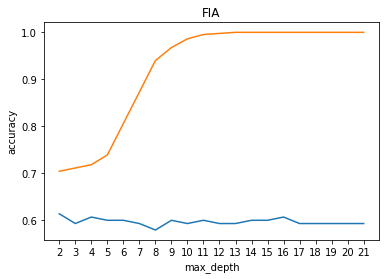

In [59]:
a = np.array(np.arange(2,22,1))
plt.plot(a, plot_test)
plt.plot(a, plot_train)
plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.title("FIA")
plt.xticks(a)
plt.show